In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

In [2]:
nyc_rats = pd.read_csv('data/Rat_Sightings.csv')
nyc_rats

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31464015,09/04/2015 12:00:00 AM,09/18/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10006.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.707772,-74.012963,"(40.70777155363643, -74.01296309970473)"
1,31464024,09/04/2015 12:00:00 AM,10/28/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,10306.0,2270 HYLAN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.575209,-74.104547,"(40.575209242947444, -74.1045465185469)"
2,31464025,09/04/2015 12:00:00 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,10310.0,758 POST AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.631236,-74.126878,"(40.63123555151668, -74.12687759748677)"
3,31464026,09/04/2015 12:00:00 AM,09/14/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11206.0,198 SCHOLES STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708987,-73.941207,"(40.70898692345805, -73.94120690238431)"
4,31464027,09/04/2015 12:00:00 AM,09/22/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10462.0,2138 WALLACE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.854130,-73.864813,"(40.85413014360452, -73.86481331044513)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101909,35494908,02/15/2017 12:00:00 AM,01/31/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,11207.0,2515 ATLANTIC AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.675635,-73.901327,"(40.67563538613833, -73.90132744872707)"
101910,35494944,02/14/2017 12:00:00 AM,02/23/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11233.0,829 HALSEY STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.685525,-73.919406,"(40.685525167695936, -73.91940607172907)"
101911,35494945,02/14/2017 12:00:00 AM,02/16/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,11213.0,98 ALBANY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.677325,-73.938679,"(40.67732468990624, -73.93867870955741)"
101912,35494970,02/14/2017 12:00:00 AM,01/17/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,11105.0,22-68 46 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.769171,-73.903860,"(40.76917070274182, -73.90386041412091)"


In [3]:
nyc_rats.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Termina

In [4]:
nyc_pop = pd.read_csv('data/NYC_Population.csv')
nyc_pop

,zip,borough,post_office,neighborhood,population,density
0,10001,Manhattan,"New York, NY",Chelsea and Clinton,21102,33959
1,10002,Manhattan,"New York, NY",Lower East Side,81410,92573
2,10003,Manhattan,"New York, NY",Lower East Side,56024,97188
3,10004,Manhattan,"New York, NY",Lower Manhattan,3089,5519
4,10005,Manhattan,"New York, NY",Lower Manhattan,7135,97048
...,...,...,...,...,...,...
172,11691,Queens,"Far Rockaway, NY",Rockaways,60035,21185
173,11692,Queens,"Arverne, NY",Rockaways,18540,18566
174,11693,Queens,"Far Rockaway, NY",Rockaways,11916,11950
175,11694,Queens,"Rockaway Park, NY",Rockaways,20408,14944


array([[<AxesSubplot:title={'center':'Unique Key'}>,
        <AxesSubplot:title={'center':'Incident Zip'}>,
        <AxesSubplot:title={'center':'Facility Type'}>,
        <AxesSubplot:title={'center':'X Coordinate (State Plane)'}>],
       [<AxesSubplot:title={'center':'Y Coordinate (State Plane)'}>,
        <AxesSubplot:title={'center':'School or Citywide Complaint'}>,
        <AxesSubplot:title={'center':'Vehicle Type'}>,
        <AxesSubplot:title={'center':'Taxi Company Borough'}>],
       [<AxesSubplot:title={'center':'Taxi Pick Up Location'}>,
        <AxesSubplot:title={'center':'Bridge Highway Name'}>,
        <AxesSubplot:title={'center':'Bridge Highway Direction'}>,
        <AxesSubplot:title={'center':'Road Ramp'}>],
       [<AxesSubplot:title={'center':'Bridge Highway Segment'}>,
        <AxesSubplot:title={'center':'Garage Lot Name'}>,
        <AxesSubplot:title={'center':'Ferry Direction'}>,
        <AxesSubplot:title={'center':'Ferry Terminal Name'}>],
       [<AxesSubp

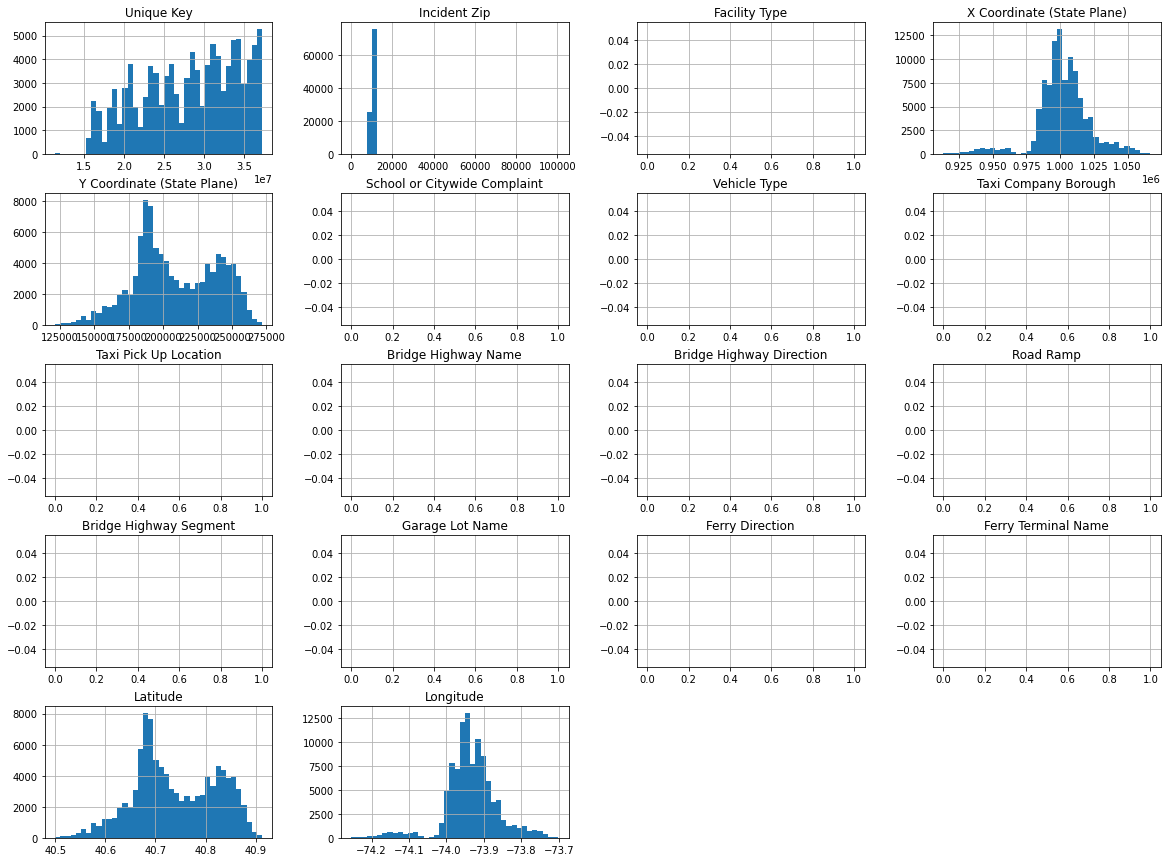

In [5]:
nyc_rats.hist(bins=40, figsize=(20, 15))

array([[<AxesSubplot:title={'center':'Incident Zip'}>]], dtype=object)

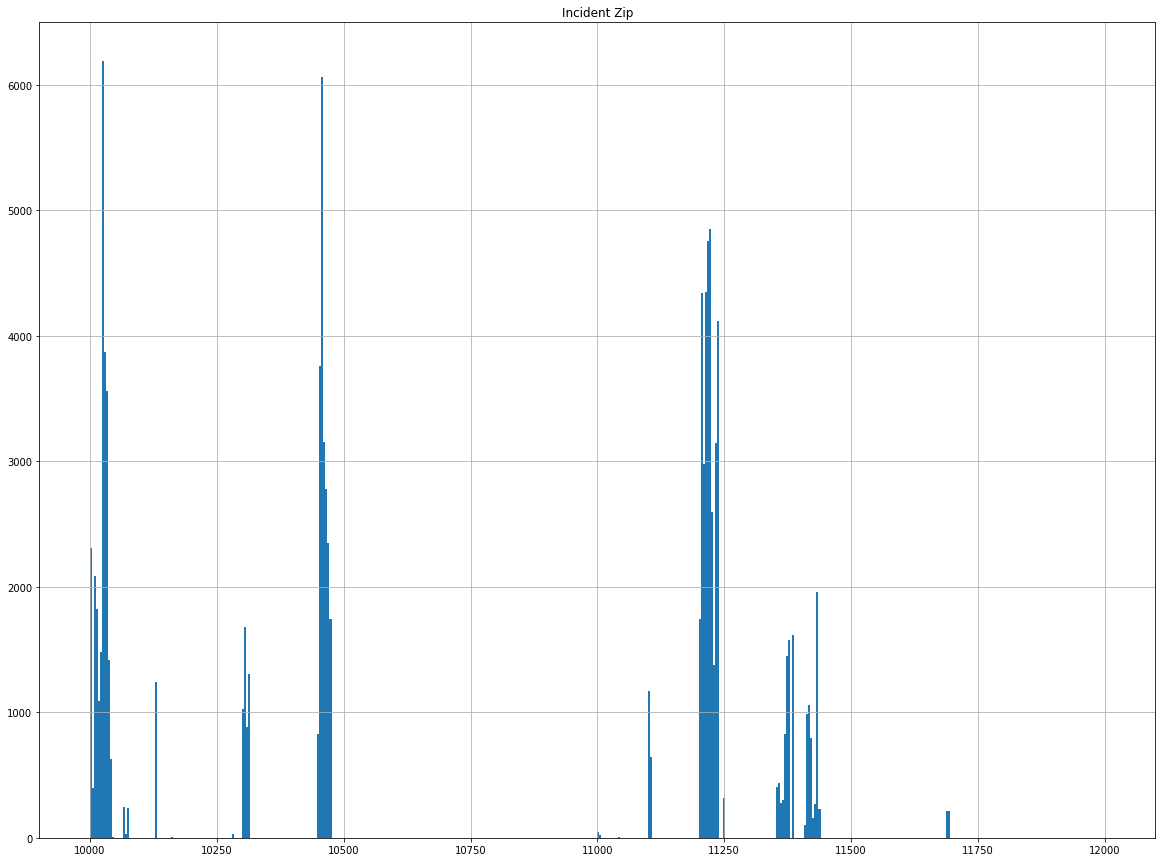

In [6]:
nyc_rats.hist(column='Incident Zip', range=[10000, 12000], bins=500, figsize=(20, 15))

In [7]:
nyc_rats['Unique Key']

0         31464015
1         31464024
2         31464025
3         31464026
4         31464027
            ...   
101909    35494908
101910    35494944
101911    35494945
101912    35494970
101913    35502334
Name: Unique Key, Length: 101914, dtype: int64

In [8]:
nyc_rats['Complaint Type'].unique()

array(['Rodent'], dtype=object)

In [9]:
nyc_rats['Descriptor'].unique()

array(['Rat Sighting'], dtype=object)

In [10]:
nyc_rats['Location Type'].unique()

array(['3+ Family Mixed Use Building', 'Commercial Building',
       '1-2 Family Dwelling', '3+ Family Apt. Building', 'Public Stairs',
       'Other (Explain Below)', 'Vacant Lot', 'Construction Site',
       'Hospital', 'Parking Lot/Garage', 'Catch Basin/Sewer',
       'Vacant Building', '1-2 Family Mixed Use Building',
       'Public Garden', 'Government Building', 'Office Building',
       'School/Pre-School', 'Day Care/Nursery',
       'Single Room Occupancy (SRO)', 'Summer Camp', nan], dtype=object)

In [11]:
nyc_rats['Agency Name'].unique()

array(['Department of Health and Mental Hygiene'], dtype=object)

In [12]:
nyc_rats['Agency'].unique()

array(['DOHMH'], dtype=object)

In [13]:
nyc_rats['Incident Zip'].unique()

array([1.00060e+04, 1.03060e+04, 1.03100e+04, 1.12060e+04, 1.04620e+04,
       1.12310e+04, 1.13540e+04, 1.12050e+04, 1.00100e+04, 1.03030e+04,
       1.12260e+04, 1.12380e+04, 1.12010e+04, 1.00030e+04, 1.12170e+04,
       1.04740e+04, 1.04680e+04, 1.00340e+04, 1.04580e+04, 1.13630e+04,
       1.04570e+04, 1.12150e+04, 1.04530e+04, 1.04720e+04, 1.13610e+04,
       1.03020e+04, 1.00350e+04, 1.12120e+04, 1.12070e+04, 1.00110e+04,
       1.13850e+04, 1.00070e+04, 1.00260e+04, 1.00270e+04, 1.12030e+04,
       1.04600e+04, 1.00020e+04, 1.12080e+04, 1.13780e+04, 1.00370e+04,
       1.04610e+04, 1.12220e+04, 1.00360e+04, 1.04730e+04, 1.12160e+04,
       1.00240e+04, 1.13770e+04, 1.00310e+04, 1.04650e+04, 1.01280e+04,
       1.12250e+04, 1.00140e+04, 1.03050e+04, 1.00130e+04, 1.00250e+04,
       1.12130e+04, 1.00290e+04, 1.03090e+04, 1.00330e+04, 1.12300e+04,
       1.12490e+04, 1.04670e+04, 1.12370e+04, 1.04640e+04, 1.00190e+04,
       1.04510e+04, 1.04700e+04, 1.04550e+04, 1.14330e+04, 1.122

In [14]:
nyc_rats_cleaned = nyc_rats.dropna(subset=['Incident Zip'])
nyc_rats_cleaned['Incident Zip'] = nyc_rats_cleaned['Incident Zip'].apply(lambda x: str(int(x)))

nyc_rats_cleaned['Incident Zip'].unique()

<ipython-input-14-797d88fbffe5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc_rats_cleaned['Incident Zip'] = nyc_rats_cleaned['Incident Zip'].apply(lambda x: str(int(x)))


array(['10006', '10306', '10310', '11206', '10462', '11231', '11354',
       '11205', '10010', '10303', '11226', '11238', '11201', '10003',
       '11217', '10474', '10468', '10034', '10458', '11363', '10457',
       '11215', '10453', '10472', '11361', '10302', '10035', '11212',
       '11207', '10011', '11385', '10007', '10026', '10027', '11203',
       '10460', '10002', '11208', '11378', '10037', '10461', '11222',
       '10036', '10473', '11216', '10024', '11377', '10031', '10465',
       '10128', '11225', '10014', '10305', '10013', '10025', '11213',
       '10029', '10309', '10033', '11230', '11249', '10467', '11237',
       '10464', '10019', '10451', '10470', '10455', '11433', '11223',
       '11419', '11355', '11372', '10304', '11210', '10456', '10454',
       '10030', '10038', '10466', '10459', '10032', '11235', '10021',
       '11421', '10012', '11211', '11233', '10040', '11204', '11412',
       '11370', '10452', '11374', '11220', '11221', '11416', '11232',
       '10022', '100

In [15]:
zip_code_counts = nyc_rats_cleaned['Incident Zip'].astype('category').value_counts()
zip_code_counts

11221    3124
11216    2494
10025    2285
11238    2158
11233    1925
         ... 
10271       1
10174       1
11242       1
10121       1
10120       1
Name: Incident Zip, Length: 191, dtype: int64

In [16]:
zip_code_counts[zip_code_counts == 1]

100354    1
11202     1
1123      1
10271     1
10174     1
11242     1
10121     1
10120     1
Name: Incident Zip, dtype: int64

In [17]:
zip_codes_with_one_row = zip_code_counts[zip_code_counts == 1].index
zip_codes_with_one_row

CategoricalIndex(['100354', '11202', '1123', '10271', '10174', '11242',
                  '10121', '10120'],
                 categories=['10000', '10001', '10002', '10003', '10004', '10005', '10006', '10007', ...], ordered=False, dtype='category')

In [18]:
nyc_rats_cleaned = nyc_rats_cleaned[~nyc_rats_cleaned['Incident Zip'].isin(zip_codes_with_one_row)]
nyc_rats_cleaned

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31464015,09/04/2015 12:00:00 AM,09/18/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10006,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.707772,-74.012963,"(40.70777155363643, -74.01296309970473)"
1,31464024,09/04/2015 12:00:00 AM,10/28/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,10306,2270 HYLAN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.575209,-74.104547,"(40.575209242947444, -74.1045465185469)"
2,31464025,09/04/2015 12:00:00 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,10310,758 POST AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.631236,-74.126878,"(40.63123555151668, -74.12687759748677)"
3,31464026,09/04/2015 12:00:00 AM,09/14/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11206,198 SCHOLES STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708987,-73.941207,"(40.70898692345805, -73.94120690238431)"
4,31464027,09/04/2015 12:00:00 AM,09/22/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10462,2138 WALLACE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.854130,-73.864813,"(40.85413014360452, -73.86481331044513)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101909,35494908,02/15/2017 12:00:00 AM,01/31/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,11207,2515 ATLANTIC AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.675635,-73.901327,"(40.67563538613833, -73.90132744872707)"
101910,35494944,02/14/2017 12:00:00 AM,02/23/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11233,829 HALSEY STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.685525,-73.919406,"(40.685525167695936, -73.91940607172907)"
101911,35494945,02/14/2017 12:00:00 AM,02/16/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,11213,98 ALBANY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.677325,-73.938679,"(40.67732468990624, -73.93867870955741)"
101912,35494970,02/14/2017 12:00:00 AM,01/17/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,11105,22-68 46 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.769171,-73.903860,"(40.76917070274182, -73.90386041412091)"


In [19]:
train_set, test_set = train_test_split(nyc_rats_cleaned, test_size=0.2, random_state=42)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(nyc_rats_cleaned, nyc_rats_cleaned['Incident Zip']):
    strat_train_set = nyc_rats_cleaned.reindex(train_index)
    strat_test_set = nyc_rats_cleaned.reindex(test_index)
    
strat_test_set['Incident Zip'].value_counts()

11221    632
11216    495
10025    472
11238    405
11233    391
        ... 
10020      1
11040      1
10000      1
10044      1
11239      1
Name: Incident Zip, Length: 183, dtype: int64

In [20]:
zip_code_sighting_percentages = strat_test_set['Incident Zip'].value_counts() / len(strat_test_set)
zip_code_sighting_percentages

11221    0.031112
11216    0.024367
10025    0.023235
11238    0.019937
11233    0.019248
           ...   
10020    0.000049
11040    0.000049
10000    0.000049
10044    0.000049
11239    0.000049
Name: Incident Zip, Length: 183, dtype: float64

In [21]:
zip_code_sighting_percentages['10023']

0.007925568573397657

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

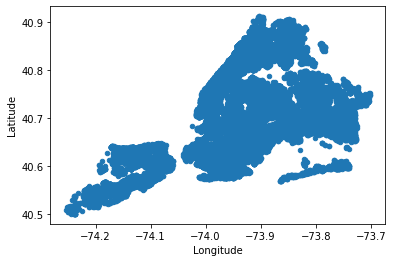

In [22]:
nyc_rats_cleaned.plot(kind='scatter', x='Longitude', y='Latitude')

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

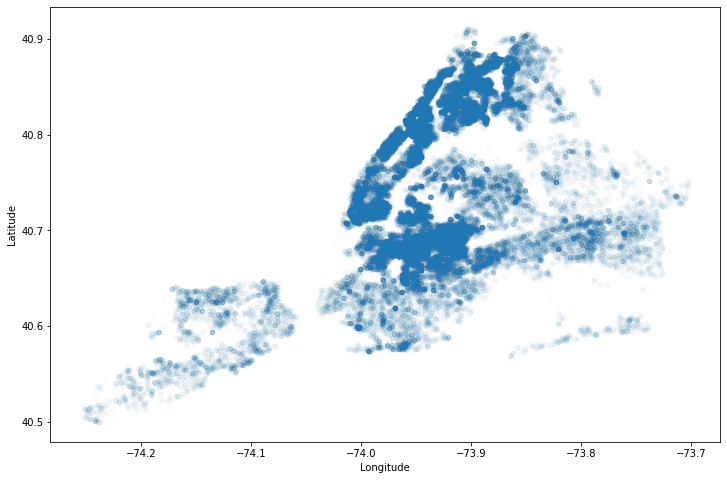

In [23]:
nyc_rats_cleaned.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.02, figsize=(12, 8))

In [24]:
nyc_rats_cleaned.corr()['Latitude']

Unique Key                      0.009631
Facility Type                        NaN
X Coordinate (State Plane)      0.401531
Y Coordinate (State Plane)      1.000000
School or Citywide Complaint         NaN
Vehicle Type                         NaN
Taxi Company Borough                 NaN
Taxi Pick Up Location                NaN
Bridge Highway Name                  NaN
Bridge Highway Direction             NaN
Road Ramp                            NaN
Bridge Highway Segment               NaN
Garage Lot Name                      NaN
Ferry Direction                      NaN
Ferry Terminal Name                  NaN
Latitude                        1.000000
Longitude                       0.402567
Name: Latitude, dtype: float64

In [25]:
nyc_pop = nyc_pop.rename(columns={
    'zip': 'Zip', 
    'borough': 'Borough', 
    'post_office': 'Post Office', 
    'neighborhood': 'Neighborhood', 
    'population': 'Population', 
    'density': 'Density'
})
nyc_pop = nyc_pop.drop(columns=['Borough'])
full_data_set = nyc_rats.join(nyc_pop.set_index('Zip'), on='Incident Zip')
full_data_set

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Post Office,Neighborhood,Population,Density
0,31464015,09/04/2015 12:00:00 AM,09/18/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10006.0,NaN,...,NaN,NaN,NaN,40.707772,-74.012963,"(40.70777155363643, -74.01296309970473)","New York, NY",Lower Manhattan,3011.0,32796.0
1,31464024,09/04/2015 12:00:00 AM,10/28/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,10306.0,2270 HYLAN BOULEVARD,...,NaN,NaN,NaN,40.575209,-74.104547,"(40.575209242947444, -74.1045465185469)","Staten Island, NY",South Shore,55909.0,7481.0
2,31464025,09/04/2015 12:00:00 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,10310.0,758 POST AVENUE,...,NaN,NaN,NaN,40.631236,-74.126878,"(40.63123555151668, -74.12687759748677)","Staten Island, NY",Port Richmond,24962.0,13903.0
3,31464026,09/04/2015 12:00:00 AM,09/14/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11206.0,198 SCHOLES STREET,...,NaN,NaN,NaN,40.708987,-73.941207,"(40.70898692345805, -73.94120690238431)","Brooklyn, NY",Bushwick and Williamsburg,81677.0,56939.0
4,31464027,09/04/2015 12:00:00 AM,09/22/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10462.0,2138 WALLACE AVENUE,...,NaN,NaN,NaN,40.854130,-73.864813,"(40.85413014360452, -73.86481331044513)","Bronx, NY",Southeast Bronx,75784.0,51207.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101909,35494908,02/15/2017 12:00:00 AM,01/31/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,11207.0,2515 ATLANTIC AVENUE,...,NaN,NaN,NaN,40.675635,-73.901327,"(40.67563538613833, -73.90132744872707)","Brooklyn, NY",East New York and New Lots,93386.0,34965.0
101910,35494944,02/14/2017 12:00:00 AM,02/23/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11233.0,829 HALSEY STREET,...,NaN,NaN,NaN,40.685525,-73.919406,"(40.685525167695936, -73.91940607172907)","Brooklyn, NY",Central Brooklyn,67053.0,49746.0
101911,35494945,02/14/2017 12:00:00 AM,02/16/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,11213.0,98 ALBANY AVENUE,...,NaN,NaN,NaN,40.677325,-73.938679,"(40.67732468990624, -73.93867870955741)","Brooklyn, NY",Central Brooklyn,63767.0,58448.0
101912,35494970,02/14/2017 12:00:00 AM,01/17/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,11105.0,22-68 46 STREET,...,NaN,NaN,NaN,40.769171,-73.903860,"(40.76917070274182, -73.90386041412091)","Astoria, NY",Northwest Queens,36688.0,22481.0


In [26]:
full_data_set.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Termina

In [27]:
full_data_set = full_data_set.loc[:, [
    'Incident Zip', 
    'Created Date',
    'Location Type', 
    'Incident Address', 
    'Status', 
    'Borough', 
    'Latitude',
    'Longitude', 
    'Post Office', 
    'Neighborhood', 
    'Population', 
    'Density'
]]

full_data_set = full_data_set.dropna(subset=['Incident Zip'])
full_data_set['Incident Zip'] = full_data_set['Incident Zip'].apply(lambda x: str(int(x)))
full_data_set

,Incident Zip,Created Date,Location Type,Incident Address,Status,Borough,Latitude,Longitude,Post Office,Neighborhood,Population,Density
0,10006,09/04/2015 12:00:00 AM,3+ Family Mixed Use Building,NaN,Closed,MANHATTAN,40.707772,-74.012963,"New York, NY",Lower Manhattan,3011.0,32796.0
1,10306,09/04/2015 12:00:00 AM,Commercial Building,2270 HYLAN BOULEVARD,Closed,STATEN ISLAND,40.575209,-74.104547,"Staten Island, NY",South Shore,55909.0,7481.0
2,10310,09/04/2015 12:00:00 AM,1-2 Family Dwelling,758 POST AVENUE,Assigned,STATEN ISLAND,40.631236,-74.126878,"Staten Island, NY",Port Richmond,24962.0,13903.0
3,11206,09/04/2015 12:00:00 AM,3+ Family Apt. Building,198 SCHOLES STREET,Closed,BROOKLYN,40.708987,-73.941207,"Brooklyn, NY",Bushwick and Williamsburg,81677.0,56939.0
4,10462,09/04/2015 12:00:00 AM,3+ Family Mixed Use Building,2138 WALLACE AVENUE,Closed,BRONX,40.854130,-73.864813,"Bronx, NY",Southeast Bronx,75784.0,51207.0
...,...,...,...,...,...,...,...,...,...,...,...,...
101909,11207,02/15/2017 12:00:00 AM,3+ Family Mixed Use Building,2515 ATLANTIC AVENUE,Pending,BROOKLYN,40.675635,-73.901327,"Brooklyn, NY",East New York and New Lots,93386.0,34965.0
101910,11233,02/14/2017 12:00:00 AM,3+ Family Apt. Building,829 HALSEY STREET,Closed,BROOKLYN,40.685525,-73.919406,"Brooklyn, NY",Central Brooklyn,67053.0,49746.0
101911,11213,02/14/2017 12:00:00 AM,3+ Family Mixed Use Building,98 ALBANY AVENUE,Closed,BROOKLYN,40.677325,-73.938679,"Brooklyn, NY",Central Brooklyn,63767.0,58448.0
101912,11105,02/14/2017 12:00:00 AM,1-2 Family Dwelling,22-68 46 STREET,Pending,QUEENS,40.769171,-73.903860,"Astoria, NY",Northwest Queens,36688.0,22481.0


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

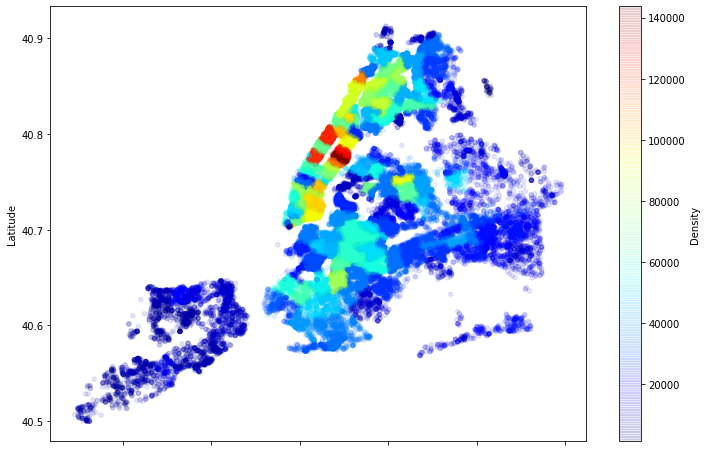

In [28]:
full_data_set.plot(
    kind='scatter', 
    x='Longitude', 
    y='Latitude', 
    alpha=0.1, 
    figsize=(12, 8), 
    c='Density', 
    cmap=plt.get_cmap('jet'), 
    colorbar=True
)

In [29]:
import folium
nyc_map = folium.Map(location=[40.7128, -74.0060], tiles='Stamen Terrain', zoom_start=10)

no_nan_data_set = full_data_set.dropna(subset=['Longitude', 'Latitude'])

for i in range(len(no_nan_data_set[:4000])):
    longitude = no_nan_data_set.iloc[i]['Longitude']
    latitude = no_nan_data_set.iloc[i]['Latitude']
    
    folium.Circle(
        location=[latitude, longitude],
        radius=300,
        fill=True,
        fill_color='purple',
        color='transparent'
    ).add_to(nyc_map)

nyc_map

In [30]:
full_data_set.corr()

,Latitude,Longitude,Population,Density
Latitude,1.000000,0.402565,-0.001620,0.426475
Longitude,0.402565,1.000000,0.088414,-0.079974
Population,-0.001620,0.088414,1.000000,0.195779
Density,0.426475,-0.079974,0.195779,1.000000


In [31]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
borough_encoded = ordinal_encoder.fit_transform(full_data_set[['Borough']])
borough_encoded

array([[2.],
       [4.],
       [4.],
       ...,
       [1.],
       [3.],
       [1.]])

In [32]:
ordinal_encoder.categories_

[array(['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND'],
       dtype=object)]

In [33]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()
borough_encoded = onehot_encoder.fit_transform(full_data_set[['Borough']])
borough_encoded

<101578x5 sparse matrix of type '<class 'numpy.float64'>'
	with 101578 stored elements in Compressed Sparse Row format>

In [34]:
borough_encoded.toarray()

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]])

In [35]:
ordinal_encoder.categories_

[array(['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND'],
       dtype=object)]